### Explore Bike Share Data

##### By Aly Kanyok, May 2022

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Prep Work / Data Wrangling

After reviewing the data samples above, I decided to work to answer the following three questions:
* Between NYC and Chicago, which age group rides for longer average duration?
* For both NYC and Chicago, which age group is comprised of more women than men?
* On which day of the week is it more common to rent a bike?

For the first and second questions, I want to combine the NYC and Chicago datasets, then calculate the rider age in a new column.

For the third question, I want to combine the three datasets into one dataset, for easier analysis, adding a new column that calculates the day of the week.

I also know that I'll be adding a plot to help answer each of my questions, so I need to import some libraries.

In [6]:
library(ggplot2)

#### For Questions 1 and 2, Combine NYC and Chicago Data

In [7]:
# Both datasets have the same column count and column names, which helps!
# First, add column to each to declare which city it's from
ny2 <- transform(ny, city="nyc")

In [8]:
# testing that the transform was successful on nyc
head(ny2,2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,city
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,nyc
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,nyc


In [9]:
# Adding column to Chicago dataset
chi2 <- transform(chi, city="chi")

In [10]:
head(chi2,2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,city
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992,chi
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992,chi


In [11]:
nyc_chi <- rbind(ny2, chi2)

##### Add column to calculate age of rider in years

In [12]:
# Pretending this data is from 2022, and not several years ago
nyc_chi <- transform(nyc_chi, age=(2022-Birth.Year))

In [13]:
# Checking the calculations
head(nyc_chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,city,age
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,nyc,24
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,nyc,41
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,nyc,35
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,nyc,36
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,nyc,30
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,nyc,36


#### For Question 3, Combine NYC, Chicago, and Washington Data

In [14]:
# Since I already combined NYC and Chicago above
# I can just use that same dataset
# I will need to drop the Gender and Birth.Year, and age columns, though

In [15]:
nyc_chi2 <- subset(nyc_chi, select=-c(Gender, Birth.Year, age))

In [16]:
head(nyc_chi2)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,nyc
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,nyc
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,nyc
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,nyc
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,nyc
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,nyc


In [17]:
# I also need to add the city column to the wash table
wash2 <- transform(wash, city="wash")

In [18]:
# Now to merge all three datasets!
all_three <- rbind(nyc_chi2, wash2)

In [19]:
head(all_three)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,nyc
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,nyc
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,nyc
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,nyc
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,nyc
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,nyc


##### Finally, let's add the column for day.of.week

In [20]:
all_three$dow <- weekdays(as.Date(all_three$Start.Time))

In [21]:
# Final visual test of work
head(all_three)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,dow
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,nyc,Sunday
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,nyc,Thursday
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,nyc,Wednesday
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,nyc,Monday
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,nyc,Wednesday
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,nyc,Wednesday


_References:_
* https://www.geeksforgeeks.org/how-to-add-a-column-based-on-other-columns-in-r-dataframe/
* https://stackoverflow.com/questions/4605206/drop-data-frame-columns-by-name

### Question 1


Between NYC and Chicago, which age group rides for longer average duration?

In [22]:
# Uses nyc_chi dataset

In [23]:
# First I wanted to see the minimum and maximum ages of riders for these cities

In [24]:
summary(nyc_chi[c("age")])

      age        
 Min.   : 20.00  
 1st Qu.: 34.00  
 Median : 41.00  
 Mean   : 43.46  
 3rd Qu.: 52.00  
 Max.   :137.00  
 NA's   :6965    

In [25]:
# So the youngest rider is 20, and the oldest rider is 137... wait, what?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6965 rows containing non-finite values (stat_bin).”

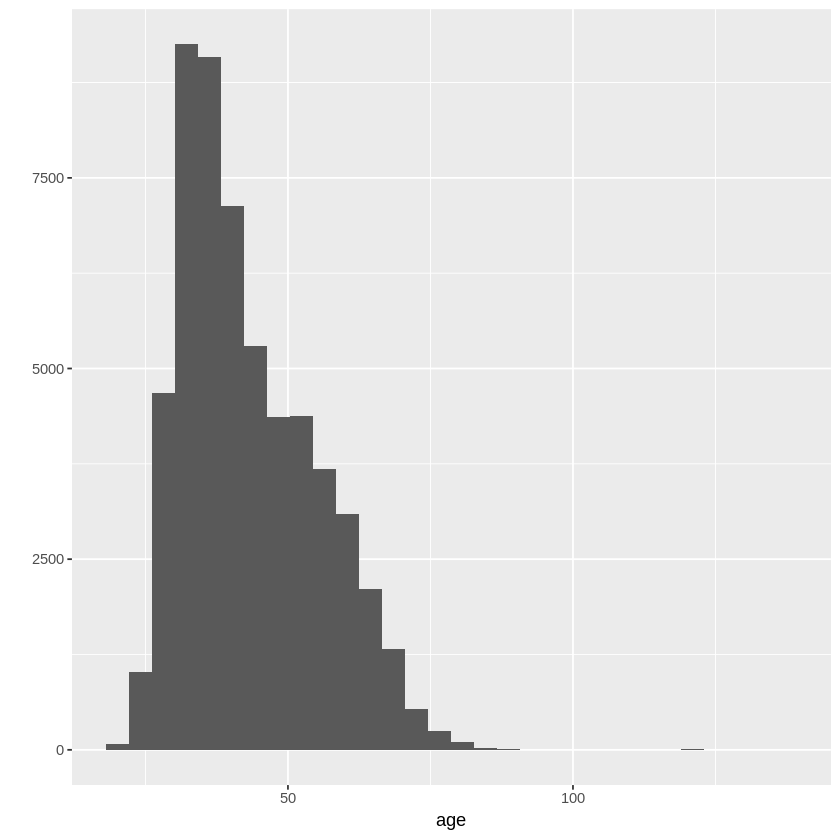

In [26]:
qplot(x=age, data=nyc_chi)

In [27]:
# Looks like we've got ourselves an x axis outlier... let's clean that up

In [28]:
# Also had an outlier on the y axis, so added limits to both axes

Warning message:
“Ignoring unknown parameters: fun, line”Warning message:
“Removed 6965 rows containing non-finite values (stat_summary).”No summary function supplied, defaulting to `mean_se()
Warning message:
“Removed 6965 rows containing missing values (geom_point).”

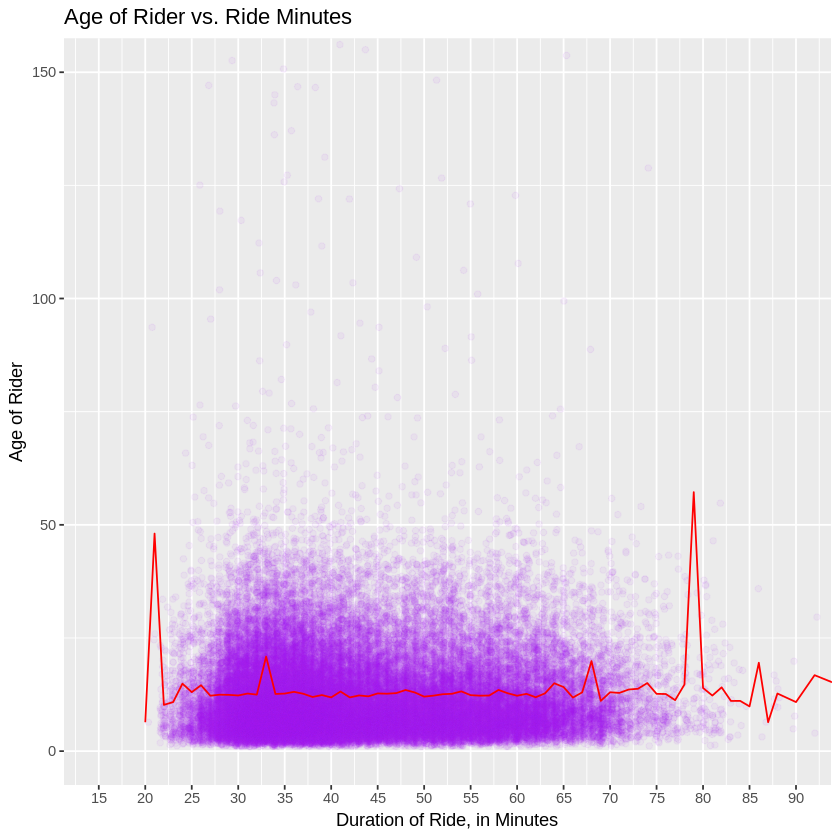

In [29]:
ggplot(aes(x=age, y=Trip.Duration/60), data=nyc_chi) +
    geom_point(alpha=0.05,
              position=position_jitter(h=0),
              color='purple') +
    coord_cartesian(xlim=c(15,90), ylim=c(0,150)) +
    stat_summary(geom="line", fun=mean, color="red", line=3) +
    xlab('Duration of Ride, in Minutes') +
    ylab('Age of Rider') +
    ggtitle('Age of Rider vs. Ride Minutes') +
    scale_x_continuous(breaks=seq(15,90,5))

In [30]:
# Now to check a by plot and find the max value by age group
max(by(nyc_chi$Trip.Duration, nyc_chi$age, mean))

[1] 3433.053

In [31]:
by(nyc_chi$Trip.Duration, nyc_chi$age, mean)

nyc_chi$age: 20
[1] 383
------------------------------------------------------------ 
nyc_chi$age: 21
[1] 2884
------------------------------------------------------------ 
nyc_chi$age: 22
[1] 613.1233
------------------------------------------------------------ 
nyc_chi$age: 23
[1] 650.4492
------------------------------------------------------------ 
nyc_chi$age: 24
[1] 894.5784
------------------------------------------------------------ 
nyc_chi$age: 25
[1] 781.9894
------------------------------------------------------------ 
nyc_chi$age: 26
[1] 873.5312
------------------------------------------------------------ 
nyc_chi$age: 27
[1] 734.9699
------------------------------------------------------------ 
nyc_chi$age: 28
[1] 748.0159
------------------------------------------------------------ 
nyc_chi$age: 29
[1] 745.9831
------------------------------------------------------------ 
nyc_chi$age: 30
[1] 737.8006
------------------------------------------------------------ 
nyc_chi$

**Per both the plot and the means per age, the max average ride time of any age group is 3433 seconds (or 57 minutes, as graphed).**

_References:_
* https://stackoverflow.com/questions/50225806/summary-for-multiple-specific-columns

### Question 2

For both NYC and Chicago, which age group is comprised of more women than men?

In [32]:
# Uses nyc_chi dataset

Warning message:
“Removed 6965 rows containing non-finite values (stat_bin).”

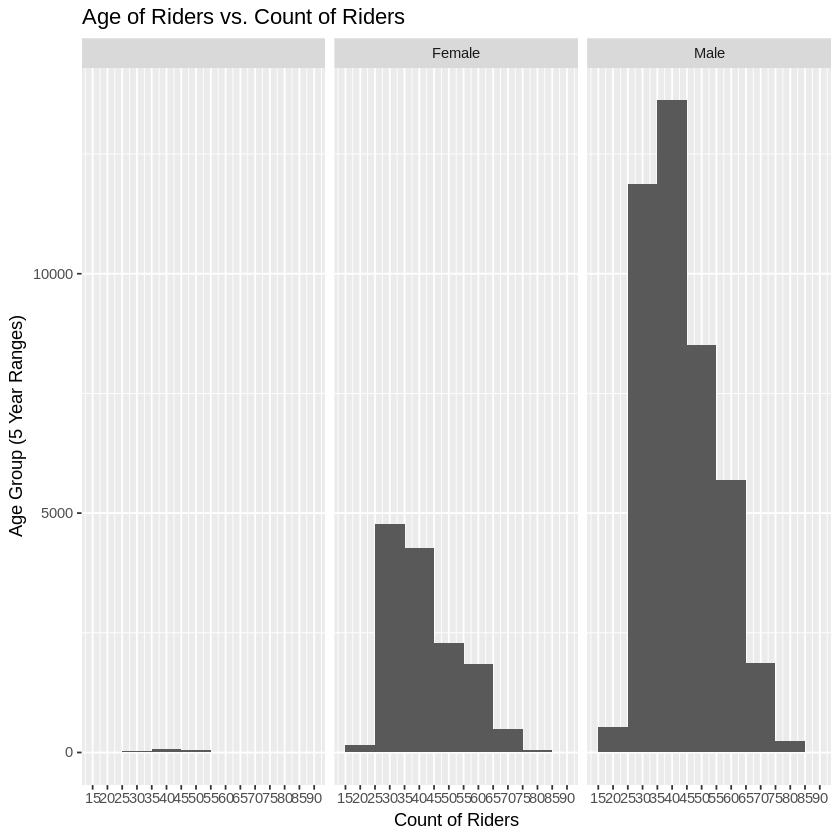

In [33]:
ggplot(aes(x=age), data=subset(nyc_chi, !is.na(Gender))) +
    geom_histogram(binwidth=10) +
    coord_cartesian(xlim=c(15,90)) +
    scale_x_continuous(breaks=seq(15,90,5)) +
    facet_grid(~Gender) +
    xlab('Count of Riders') +
    ylab('Age Group (5 Year Ranges)') +
    ggtitle('Age of Riders vs. Count of Riders')

In [34]:
by(nyc_chi$age, nyc_chi$Gender, summary)

nyc_chi$Gender: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  24.00   38.00   42.50   45.48   51.00  137.00    6964 
------------------------------------------------------------ 
nyc_chi$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   21.0    33.0    39.0    42.4    51.0   129.0       1 
------------------------------------------------------------ 
nyc_chi$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    34.0    41.0    43.8    52.0   136.0 

**Based on both the plots as well as the by summary, male riders are more prevalent in all age groups than women.**

**Males between the ages of 35 and 40 make up the largest group of men; women between the ages of 30 and 35 make up the largest group of women (closely followed by women 35-40).**

**Null gender type makes up a very small subset of riders, and includes outliers we had previous removed from our plots (such as the rider recorded as being age 137). This makes it difficult to tell if these riders have been erroneously recorded, or are non-binary.**

### Question 3

On which day of the week is it more common to rent a bike?

In [35]:
# Uses all_three dataset

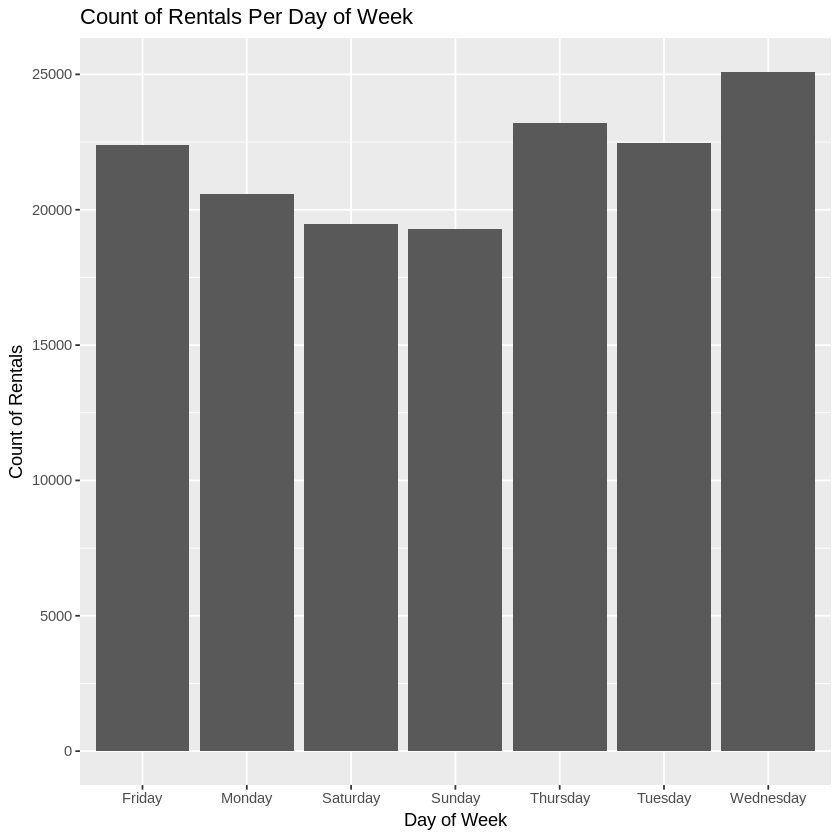

In [36]:
ggplot(aes(x=dow), data=subset(all_three, !is.na(dow))) +
    geom_bar() +
    ggtitle('Count of Rentals Per Day of Week') +
    xlab('Day of Week') +
    ylab('Count of Rentals')

In [37]:
table(all_three$dow)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    22379     20593     19459     19274     23187     22478     25080 

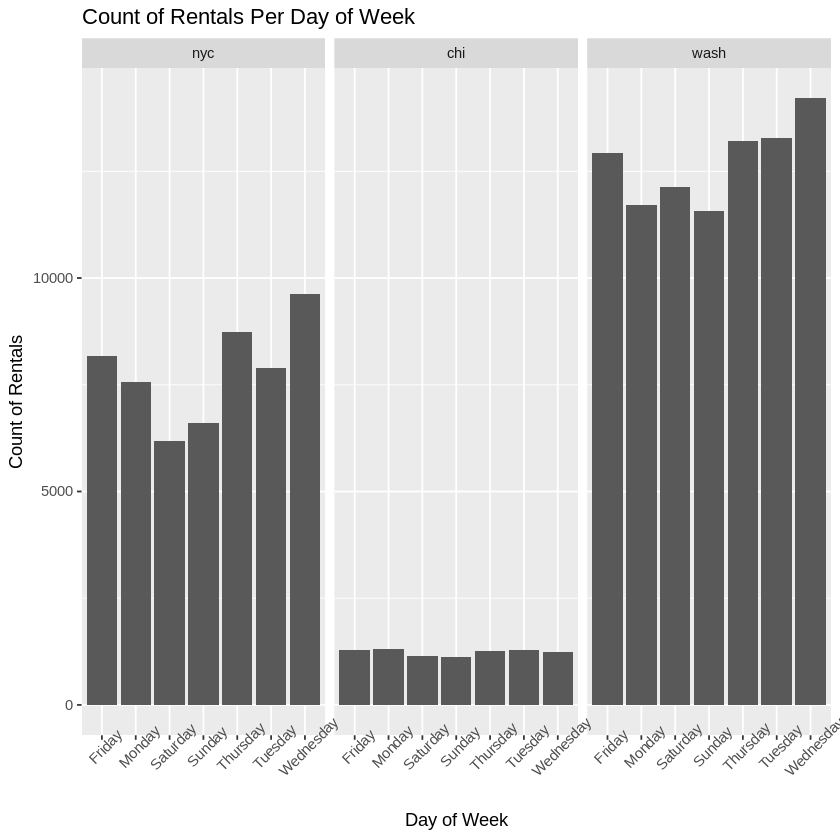

In [38]:
# I also wanted to see if there were any patterns of day of week rentals
# Based on the city
ggplot(aes(x=dow), data=subset(all_three, !is.na(dow))) +
    geom_bar() +
    ggtitle('Count of Rentals Per Day of Week') +
    xlab('Day of Week') +
    ylab('Count of Rentals') +
    facet_wrap(~city) +
    theme(axis.text.x = element_text(angle = 45))

In [39]:
table(all_three$dow, all_three$city)

           
              nyc   chi  wash
  Friday     8168  1285 12926
  Monday     7570  1302 11721
  Saturday   6176  1150 12133
  Sunday     6597  1111 11566
  Thursday   8729  1254 13204
  Tuesday    7898  1292 13288
  Wednesday  9632  1236 14212

**For all three cities combined, Wednesdays saw the highest rental rates. When taken individually, both NYC and Washington saw the highest rental rates on Wednesdays, but Chicago saw lightly more rentals overall on Mondays.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [115]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')